In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

c_share = 2
price = 210.00
div_rate = 1.38
n_share = 0
add_shares = 0
div_bal = 0.000
div_percentage = 0.024

print(c_share)
print(div_rate)
print(price)
print(c_share+add_shares)
# n_share += c_share + add_shares

2
1.38
210.0
2


   Number of Shares  Add Shares  New Price  Total Value  Cost per Quarter  \
0              75.0        20.0     217.76     16332.00            4355.2   
1              95.0        20.0     211.05     20049.75            4221.0   
2             116.0        21.0     218.72     25371.52            4374.4   

   Div Balance  Total Div Returns  
0        64.90             153.40  
1       153.40             265.50  
2        46.78             183.66  
     Number of Shares  Add Shares  New Price  Total Value  Cost per Quarter  \
122            3095.0        27.0     527.90   1633850.50           10558.0   
123            3122.0        27.0     523.18   1633367.96           10463.6   
124            3149.0        27.0     531.74   1674449.26           10634.8   

     Div Balance  Total Div Returns  
122        75.68            3727.78  
123        65.52            3749.48  
124        27.30            3743.12  


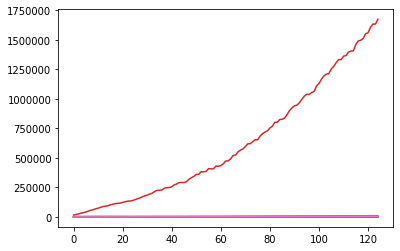

In [8]:
iters = 125
labels = ['Number of Shares', 'Add Shares', 'New Price', 'Total Value', 'Cost per Quarter'
          , 'Div Balance', 'Total Div Returns']
c_share = 55
price = 220.00
div_rate = 1.18
n_share = 0.00
flat_cost = 20
div_bal = 0.000
div_percentage = 0.0204
total_shares = []
for period in range(0, iters):
    n_price = round((price + random.randint(-9,9)*1.1)*1.01, 2)
    cost_per_share = n_price * (flat_cost)
    div_bal = round(div_rate * c_share, 3) + div_bal
    add_shares = np.math.floor(div_bal/n_price) + (flat_cost)
    if div_bal <= n_price:
        div_bal = div_bal
    else:
        div_bal = div_bal - ((add_shares-flat_cost)*n_price)
    n_share = c_share + add_shares
    c_share = n_share
    total_shares.append([n_share, add_shares, n_price, round(n_price*n_share, 2), round(cost_per_share, 4)
                         , div_bal
#                          , (round(div_percentage * n_price, 3) * c_share)
                         , (round(div_rate * c_share, 3) + div_bal)
                        ])
    price = n_price
numpy_data = np.array(total_shares)
df = pd.DataFrame(data = numpy_data, columns = labels)
print(df.head(3))
print(df.tail(3))
plt.plot(df)

In [5]:
print(df.head(10))

print(df.tail(10))

   Number of Shares  Add Shares  New Price  Total Value  Cost per Quarter  \
0              75.0        20.0     224.42     16831.50            4488.4   
1              95.0        20.0     227.78     21639.10            4555.6   
2             116.0        21.0     226.72     26299.52            4534.4   
3             136.0        20.0     221.21     30084.56            4424.2   
4             157.0        21.0     213.42     33506.94            4268.4   
5             178.0        21.0     215.55     38367.90            4311.0   
6             199.0        21.0     213.26     42438.74            4265.2   
7             220.0        21.0     214.28     47141.60            4285.6   
8             241.0        21.0     221.98     53497.18            4439.6   
9             262.0        21.0     218.64     57283.68            4372.8   

   Div Balance  Total Div Returns  
0        64.90             153.40  
1       153.40             265.50  
2        38.78             175.66  
3       

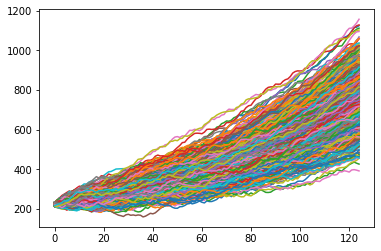

In [42]:
##Builds a series to test against
Sim_final_results = []

for i in range(0,50):
    iters = 125
    labels = ['Number of Shares', 'Add Shares', 'New Price', 'Total Value', 'Cost per Quarter'
              , 'Div Balance', 'Total Div Returns']
    c_share = 45
    price = 220.00
    div_rate = 1.18
    n_share = 0.00
    flat_cost = 20
    div_bal = 0.000
    div_percentage = 0.0204
    total_shares = []
    for period in range(0, iters):
        n_price = round((price + random.randint(-9,9)*1.1)*1.01, 2)
        if n_price <= 2:
            n_price = 2
        elif n_price >= 9000:
            n_price = 9000
        else:
            n_price
        cost_per_share = n_price * (flat_cost)
        div_bal = (round(div_percentage * n_price, 3) * c_share) + div_bal
        add_shares = np.math.floor(div_bal/n_price) + (flat_cost)
        if div_bal <= n_price:
            div_bal = div_bal
        else:
            div_bal = div_bal - ((add_shares-flat_cost)*n_price)
        n_share = c_share + add_shares
        c_share = n_share
        total_shares.append([n_share, add_shares, n_price, round(n_price*n_share, 2), round(cost_per_share, 4)
                             , div_bal
                             , (round(div_percentage * n_price, 3) * c_share)
                            ])
        price = n_price
    numpy_data = np.array(total_shares)
    df = pd.DataFrame(data = numpy_data, columns = labels)
    plt.plot(df.loc[:, ['New Price']])
    Sim_final_results.append([df])
    df2 = pd.DataFrame(data = Sim_final_results)
    df.to_csv(r'~/exported.csv',index = False, header = True)

## Building the output for analysis

In [56]:
##Builds a series to test against
Sim_final_results = []

for i in range(0,50000):
    iters = 31 * 4
    labels = ['Number of Shares', 'Add Shares', 'New Price', 'Total Value', 'Cost per New Share', 'Period']
    c_share = 100
    price = 210.00
    div_rate = 1.18
    n_share = 0.00
    flat_cost = 2.00
    total_shares = []
    for period in range(0, iters):
        n_price = round((price + random.randint(-9,9)*1.10)*1.01, 2)
        if n_price <= 2:
            n_price = 2
        elif n_price >= 9000:
            n_price = 9000
        else:
            n_price
        cost_per_share = n_price * (flat_cost)
        add_shares = np.math.floor((c_share*div_rate)/n_price) + (flat_cost)
        n_share = c_share + add_shares
        c_share = n_share
        total_shares.append([n_share, add_shares, n_price, round(n_price*n_share, 2), round(cost_per_share, 4),period])
            
    Sim_final_results.append(total_shares[-1])
numpy_data = np.array(Sim_final_results)
df = pd.DataFrame(data = numpy_data, columns = labels)
df.drop(['Period'], axis = 1, inplace = True)
df.to_csv(r'~/repow/funzies/exported.csv', index = False, header = True)

   Number of Shares  Add Shares  New Price  Total Value  Cost per New Share
0             457.0         4.0     212.10     96929.70              424.20
1             455.0         4.0     217.66     99035.30              435.32
2             458.0         4.0     205.43     94086.94              410.86
3             458.0         4.0     207.66     95108.28              415.32
4             455.0         4.0     214.32     97515.60              428.64
       Number of Shares  Add Shares  New Price  Total Value  \
49995             454.0         4.0     220.99    100329.46   
49996             453.0         4.0     204.32     92556.96   
49997             455.0         4.0     217.66     99035.30   
49998             457.0         4.0     219.88    100485.16   
49999             458.0         4.0     202.10     92561.80   

       Cost per New Share  
49995              441.98  
49996              408.64  
49997              435.32  
49998              439.76  
49999              404.20

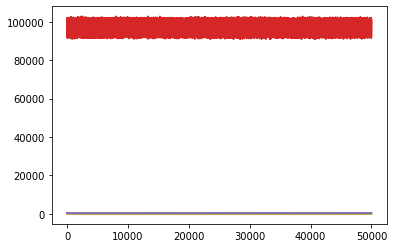

In [54]:
plt.plot(df)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Shares    50000 non-null  float64
 1   Add Shares          50000 non-null  float64
 2   New Price           50000 non-null  float64
 3   Total Value         50000 non-null  float64
 4   Cost per New Share  50000 non-null  float64
dtypes: float64(5)
memory usage: 1.9 MB


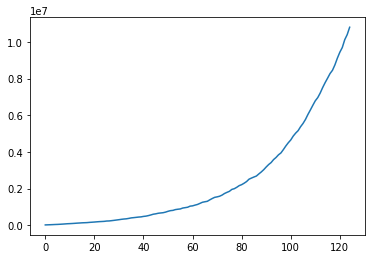

In [46]:
df['Total Value'].plot.line()